### More mature version of spectral clustering based on travel time. Method is based on class notes.

In [46]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('data/chicago_taxi_trips_2016_11.csv') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295000 entries, 0 to 1294999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   taxi_id                 1294453 non-null  float64
 1   trip_start_timestamp    1295000 non-null  object 
 2   trip_end_timestamp      1294850 non-null  object 
 3   trip_seconds            1294564 non-null  float64
 4   trip_miles              1294987 non-null  float64
 5   pickup_census_tract     0 non-null        float64
 6   dropoff_census_tract    826575 non-null   float64
 7   pickup_community_area   1176867 non-null  float64
 8   dropoff_community_area  1149193 non-null  float64
 9   fare                    1294983 non-null  float64
 10  tips                    1294983 non-null  float64
 11  tolls                   1294983 non-null  float64
 12  extras                  1294983 non-null  float64
 13  trip_total              1294983 non-null  float64
 14  pa

In [3]:
# data.head()
data = data.dropna(axis=1, how='all')

In [4]:
data = data.dropna(axis=0)

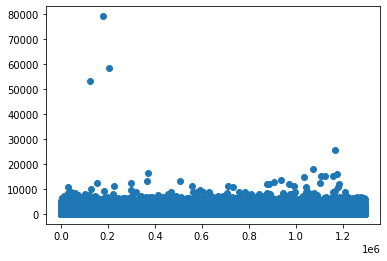

In [6]:
plt.plot(data.trip_seconds, 'o')

In [7]:
# clean_data = data[['company', 'fare', 'trip_seconds']]
clean_data = data[['pickup_community_area', 'dropoff_community_area', 'trip_seconds']]
clean_data = clean_data[clean_data.trip_seconds>100.0]

In [8]:
clean_data.head()

,pickup_community_area,dropoff_community_area,trip_seconds
1,32.0,28.0,540.0
3,32.0,8.0,480.0
9,76.0,24.0,1320.0
13,32.0,32.0,1500.0
14,3.0,32.0,1320.0


#### group data by station

In [10]:
sorted_data = clean_data.sort_values(by=['pickup_community_area', 'dropoff_community_area'], ascending=True)

In [19]:
sorted_data.head(10)

,pickup_community_area,dropoff_community_area,trip_seconds
78463,1.0,1.0,120.0
418064,1.0,1.0,420.0
629393,1.0,1.0,120.0
1215406,1.0,1.0,300.0
1250424,1.0,1.0,420.0
514244,1.0,3.0,540.0
565715,1.0,3.0,540.0
24385,1.0,4.0,480.0
197662,1.0,6.0,660.0
237440,1.0,6.0,660.0


In [15]:
sorted_data.value_counts(['pickup_community_area'])

pickup_community_area
8.0                      188721
32.0                     149421
28.0                      48711
76.0                      29753
33.0                      18468
7.0                        9423
56.0                       8450
6.0                        6592
24.0                       3152
3.0                         920
22.0                        410
41.0                        285
77.0                        158
5.0                          89
34.0                         47
1.0                          27
14.0                         24
59.0                         23
16.0                         22
39.0                         22
4.0                          21
11.0                         14
2.0                          12
35.0                          8
21.0                          7
31.0                          4
27.0                          2
15.0                          1
10.0                          1
23.0                          1
dtype: int64

## Trips and travel time map

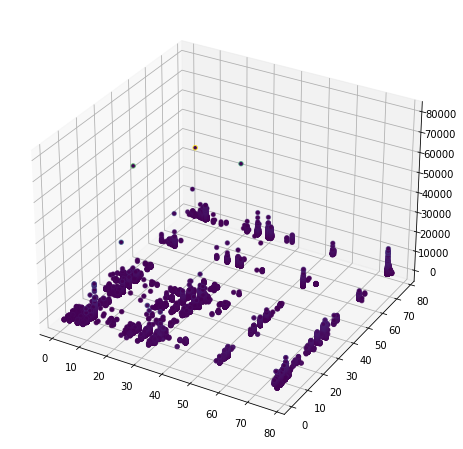

In [13]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
xdata = sorted_data.pickup_community_area
ydata = sorted_data.dropoff_community_area
zdata = sorted_data.trip_seconds

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

In [26]:
sorted_data['dropoff_community_area'].unique()

array([ 1.,  3.,  4.,  6.,  8., 28., 32., 76., 77.,  2.,  5.,  7., 14.,
       16., 22., 24., 33., 41., 56., 12., 21., 13., 31., 34., 10., 11.,
       15., 27., 35., 39., 60., 23., 25., 29., 30., 74., 26., 38., 71.,
       36., 42., 59.])

#### Mean time from one station to another 

In [44]:
adjacency_df = pd.crosstab(index=sorted_data.pickup_community_area, 
                    columns=sorted_data.dropoff_community_area, 
                    values=sorted_data.trip_seconds,
                    aggfunc=np.mean).round(2).fillna(0)
idx = adjacency_df.columns.union(adjacency_df.index)
adjacency_df = adjacency_df.reindex(index = idx, columns=idx, fill_value=0) 
adjacency_df.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,...,39.0,41.0,42.0,56.0,59.0,60.0,71.0,74.0,76.0,77.0
1.0,276.0,0.0,540.00,480.0,0.0,673.33,0.00,1236.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2340.00,180.00
2.0,0.0,156.0,0.00,0.0,0.0,0.00,0.00,1800.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1620.00,480.00
3.0,620.0,720.0,303.75,468.0,600.0,465.31,754.67,899.48,0.0,0.0,...,0.0,1860.0,0.0,2449.09,0.0,0.0,0.0,0.0,3006.15,543.33
4.0,0.0,0.0,360.00,240.0,510.0,660.00,1180.00,1080.00,0.0,0.0,...,0.0,0.0,0.0,1560.00,0.0,0.0,0.0,0.0,2400.00,660.00
5.0,0.0,0.0,732.00,370.0,180.0,524.44,870.00,1196.25,0.0,0.0,...,0.0,0.0,0.0,2400.00,0.0,0.0,0.0,0.0,1960.00,0.00


In [49]:
adjacency_df.index

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0,
              28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.0, 39.0,
              41.0, 42.0, 56.0, 59.0, 60.0, 71.0, 74.0, 76.0, 77.0],
             dtype='float64')

In [50]:
adjacency_df.columns

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0,
              28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.0, 39.0,
              41.0, 42.0, 56.0, 59.0, 60.0, 71.0, 74.0, 76.0, 77.0],
             dtype='float64')

<AxesSubplot:>

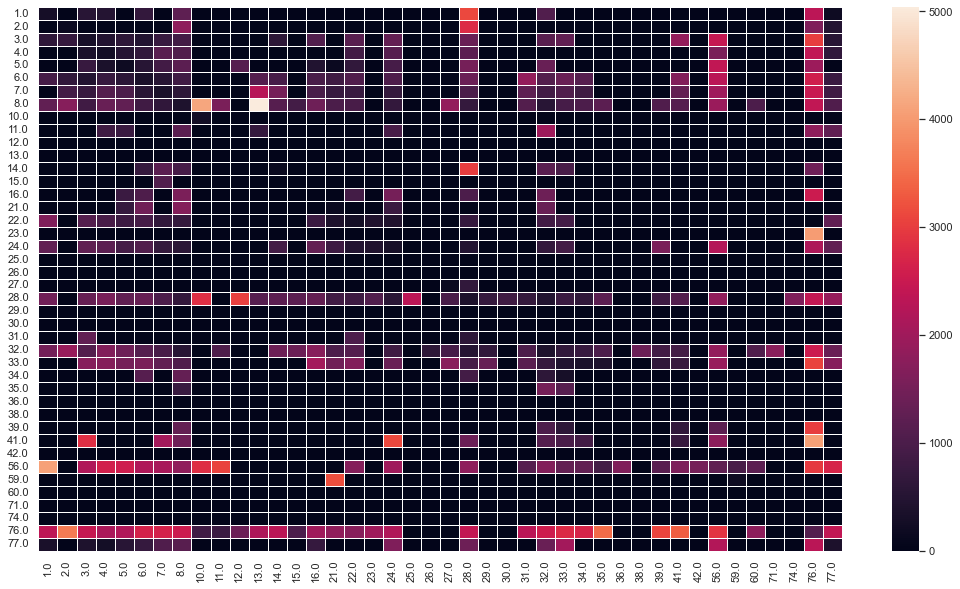

In [56]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(adjacency_df,linewidths=.5)

In [57]:
adjacency_matrix = adjacency_df.to_numpy()

In [69]:
adjacency_matrix

array([[ 276.  ,    0.  ,  540.  , ...,    0.  , 2340.  ,  180.  ],
       [   0.  ,  156.  ,    0.  , ...,    0.  , 1620.  ,  480.  ],
       [ 620.  ,  720.  ,  303.75, ...,    0.  , 3006.15,  543.33],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [2360.  , 3624.  , 2443.2 , ...,    0.  , 1111.68, 2383.02],
       [ 342.86,    0.  ,  409.66, ...,    0.  , 2312.73,  380.  ]])

#### Spectral clustering

In [66]:
from sklearn.preprocessing import normalize
x_normed = normalize(adjacency_matrix, axis=0, norm='l2')

In [67]:
x_normed = x_normed.round(3)
x_normed

array([[0.048, 0.   , 0.096, ..., 0.   , 0.198, 0.033],
       [0.   , 0.034, 0.   , ..., 0.   , 0.137, 0.088],
       [0.107, 0.155, 0.054, ..., 0.   , 0.254, 0.1  ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.406, 0.782, 0.434, ..., 0.   , 0.094, 0.438],
       [0.059, 0.   , 0.073, ..., 0.   , 0.195, 0.07 ]])

In [68]:
degree_matrix = np.diagflat(x_normed.sum(axis=1))
degree_matrix


array([[ 1.415,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.939,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  3.465, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 15.021,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  2.637]])

In [76]:
prob_tran_matrix = (np.linalg.pinv(degree_matrix) @ x_normed).round(3)
prob_tran_matrix

array([[0.034, 0.   , 0.068, ..., 0.   , 0.14 , 0.023],
       [0.   , 0.036, 0.   , ..., 0.   , 0.146, 0.094],
       [0.031, 0.045, 0.016, ..., 0.   , 0.073, 0.029],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.027, 0.052, 0.029, ..., 0.   , 0.006, 0.029],
       [0.022, 0.   , 0.028, ..., 0.   , 0.074, 0.027]])

In [77]:
prob_tran_matrix.shape

(42, 42)

In [78]:
laplacian_matrix = np.eye(prob_tran_matrix.shape[0]) - prob_tran_matrix
laplacian_matrix

array([[ 0.966,  0.   , -0.068, ...,  0.   , -0.14 , -0.023],
       [ 0.   ,  0.964,  0.   , ...,  0.   , -0.146, -0.094],
       [-0.031, -0.045,  0.984, ...,  0.   , -0.073, -0.029],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [-0.027, -0.052, -0.029, ...,  0.   ,  0.994, -0.029],
       [-0.022,  0.   , -0.028, ...,  0.   , -0.074,  0.973]])

In [109]:
eig_vals, eig_vecs = np.linalg.eig(laplacian_matrix) 

In [110]:
np.sort(eig_vals.real)[::-1]

array([1.50162411, 1.17947128, 1.17947128, 1.1767073 , 1.11920557,
       1.11920557, 1.07396202, 1.07396202, 1.05091623, 1.05091623,
       1.0287089 , 1.01988312, 1.01988312, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9898917 , 0.9898917 , 0.98588609, 0.98588609, 0.9801438 ,
       0.97771193, 0.97771193, 0.87855637, 0.87855637, 0.8775879 ,
       0.82076549, 0.82076549, 0.78151494, 0.78151494, 0.67409254,
       0.10960597, 0.        ])

In [111]:
# eig_vals[np.argsort(eig_vals.real)]
np.argsort(eig_vals.real)[::-1]

array([ 1,  7,  8, 11, 16, 17, 12, 13, 21, 22, 25, 20, 19, 40, 41, 34, 39,
       38, 30, 31, 37, 32, 33, 36, 35, 24, 23, 27, 26, 28, 14, 15, 10,  9,
       18,  4,  3,  6,  5,  2,  0, 29])

In [112]:
eig_vecs[np.argsort(eig_vals.real)[::-1]].real[0]

array([ 0.16714335,  0.23492577, -0.15231591, -0.13968109, -0.13968109,
        0.02917276,  0.02917276,  0.02587834,  0.02587834, -0.07621456,
       -0.07621456,  0.01205456, -0.28781809, -0.28781809,  0.17981908,
        0.17981908, -0.12392275, -0.12392275, -0.27795926,  0.07135308,
        0.07135308, -0.14906256, -0.14906256, -0.21030558, -0.21030558,
       -0.19929934,  0.01585916,  0.01585916, -0.06067128,  0.10719944,
        0.24906782,  0.03488702,  0.345121  , -0.27766225,  0.11253634,
        0.345121  ,  0.07583578, -0.27766225,  0.07583578, -0.34974164,
       -0.27766225,  0.345121  ])

In [113]:
eig_vecs = eig_vecs[np.argsort(eig_vals.real)[::-1]].real

In [115]:
eig_vecs[:,0:2]

array([[ 0.16714335,  0.23492577],
       [ 0.15765951, -0.17008472],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.20697706, -0.11927003],
       [ 0.2095855 ,  0.40280283],
       [ 0.17634999,  0.24931608],
       [ 0.21205672,  0.25053191],
       [ 0.13817294,  0.1127059 ],
       [ 0.11603174, -0.13472378],
       [ 0.21517445,  0.14633152],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.18661368, -0.20205561],
       [ 0.19573753,  0.12672803],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.18962665,  0.20231686],
       [ 0.20391946,  0.1442107 ],
       [ 0.22321814, -0.21231616],
       [ 0.15908273, -0.0186764 ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.17977526, -0.07670736],
       [ 0.13223915,

### 2 clusters are sufficient

In [128]:
from sklearn.cluster import KMeans 
k = 2 
kmeans = KMeans(n_clusters=k)
kmeans.fit(eig_vecs[:,0:k])
clusters = kmeans.labels_

In [129]:
clusters

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
      dtype=int32)

(array([17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

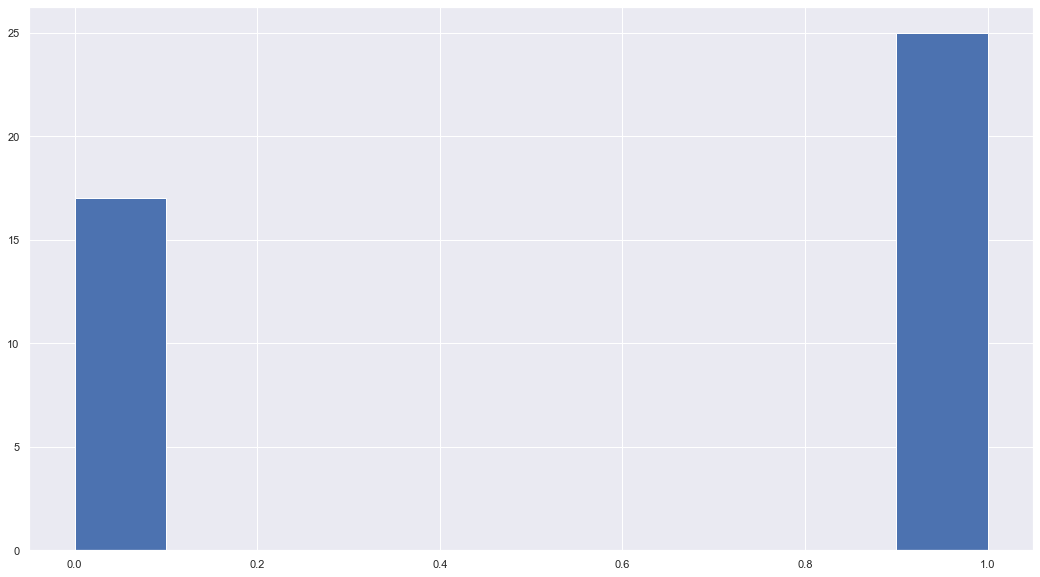

In [130]:
plt.hist(clusters)

In [131]:
import networkx as nx
def draw(G):
    from pylab import rcParams
    rcParams['figure.figsize'] = 14, 10

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_size=500, node_color ='green')
    # labels = nx.get_edge_attributes(G, 'weight') 
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) 

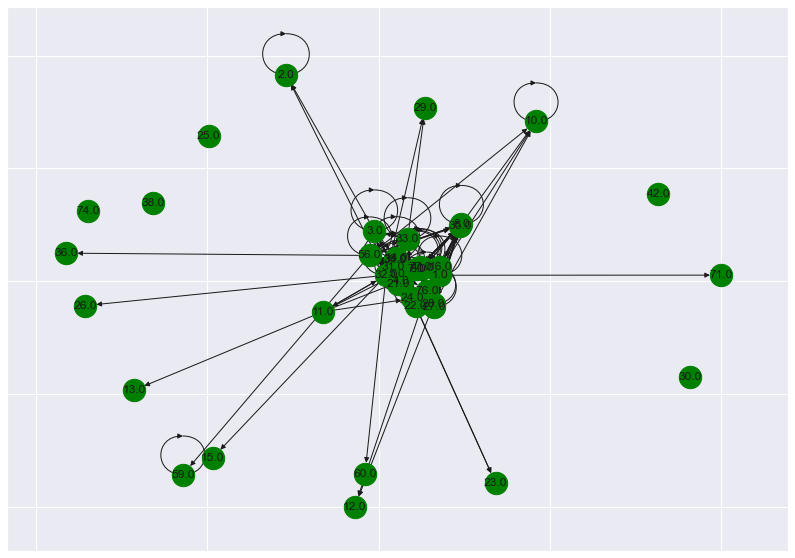

In [132]:
for i in range(2):
    # c = adjacency_df[sc.labels_ == 0 ]
    G = nx.from_pandas_adjacency(adjacency_df[clusters == i ], create_using=nx.DiGraph) 
    draw(G)

In [140]:
adjacency_df.loc[[25,38,74]]

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,...,39.0,41.0,42.0,56.0,59.0,60.0,71.0,74.0,76.0,77.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
